# Kansas City, MCI Airport
NOAA GHCN Data: https://www.ncei.noaa.gov/cdo-web/datasets

In [1]:
import pandas as pd
import numpy as np

In [2]:
weather=pd.read_csv("MCI_40.csv")
weather['DATE']= pd.to_datetime(weather['DATE'])
weather.set_index(["DATE"],inplace=True)
weather = weather.loc['1993-01-01':'2022-12-31']

In [3]:
# The documention details the core weather variables + wind. (These variables have the lowest null values.)
df = weather[["AWND","PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
df.apply(pd.isnull).sum()

AWND      6
PRCP      0
SNOW    126
SNWD    134
TMAX      0
TMIN      0
dtype: int64

# AWND

In [4]:
w = df.AWND.isna().groupby(df.AWND.notna().cumsum()).sum()
w = w[w!=0]

b = pd.cut(w, bins=[0, 1, 5, np.inf], labels=['0-1','2-5','6 and above'])
out = b.groupby(b).size().reset_index(name='Number')
print (out)

          AWND  Number
0          0-1       2
1          2-5       2
2  6 and above       0


In [5]:
w = df.AWND.isna().groupby(df.AWND.notna().cumsum()).cumsum() #cumsum for index location
w = w[w!=0]
pd.set_option('display.max_rows', None)
w

DATE
1997-04-06    1
1997-08-25    1
1997-08-26    2
1998-05-02    1
1999-11-05    1
1999-11-06    2
Name: AWND, dtype: int64

In [6]:
filtered_df = df.loc['1999-11-04':'1999-11-07']
filtered_df

,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,
1999-11-04,10.51,0.0,0.0,0.0,68,33
1999-11-05,NaN,0.0,0.0,0.0,70,52
1999-11-06,NaN,0.0,0.0,0.0,74,55
1999-11-07,5.59,0.0,0.0,0.0,76,45


In [7]:
df.loc[df['AWND'].isnull(),'AWND']=df['AWND'].interpolate()

In [8]:
filtered_df = df.loc['1999-11-04':'1999-11-07']
filtered_df

,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,
1999-11-04,10.51,0.0,0.0,0.0,68,33
1999-11-05,8.87,0.0,0.0,0.0,70,52
1999-11-06,7.23,0.0,0.0,0.0,74,55
1999-11-07,5.59,0.0,0.0,0.0,76,45


In [9]:
df.apply(pd.isnull).sum()

AWND      0
PRCP      0
SNOW    126
SNWD    134
TMAX      0
TMIN      0
dtype: int64

# SNOW

In [10]:
s = df.SNOW.isna().groupby(df.SNOW.notna().cumsum()).sum()
s = s[s!=0]

b = pd.cut(s, bins=[0, 1, 5, np.inf], labels=['0-1','2-5','6 and above'])
out = b.groupby(b).size().reset_index(name='Number')
print (out)

          SNOW  Number
0          0-1       3
1          2-5       0
2  6 and above       1


In [11]:
pd.set_option('display.max_rows', None)
s = df.SNOW.isna().groupby(df.SNOW.notna().cumsum()).cumsum() #cumsum for index location
s = s[s!=0]
s

DATE
1996-02-17      1
1996-02-19      1
1996-05-09      1
1996-05-31      1
1996-06-01      2
1996-06-02      3
1996-06-03      4
1996-06-04      5
1996-06-05      6
1996-06-06      7
1996-06-07      8
1996-06-08      9
1996-06-09     10
1996-06-10     11
1996-06-11     12
1996-06-12     13
1996-06-13     14
1996-06-14     15
1996-06-15     16
1996-06-16     17
1996-06-17     18
1996-06-18     19
1996-06-19     20
1996-06-20     21
1996-06-21     22
1996-06-22     23
1996-06-23     24
1996-06-24     25
1996-06-25     26
1996-06-26     27
1996-06-27     28
1996-06-28     29
1996-06-29     30
1996-06-30     31
1996-07-01     32
1996-07-02     33
1996-07-03     34
1996-07-04     35
1996-07-05     36
1996-07-06     37
1996-07-07     38
1996-07-08     39
1996-07-09     40
1996-07-10     41
1996-07-11     42
1996-07-12     43
1996-07-13     44
1996-07-14     45
1996-07-15     46
1996-07-16     47
1996-07-17     48
1996-07-18     49
1996-07-19     50
1996-07-20     51
1996-07-21     52
1996-

In [12]:
filtered_df = df.loc['1996-02-15':'1996-02-20']
filtered_df

,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,
1996-02-15,16.11,0.0,0.0,0.0,42,16
1996-02-16,10.29,0.0,0.0,0.0,32,9
1996-02-17,13.87,0.0,NaN,NaN,43,23
1996-02-18,9.62,0.0,0.0,0.0,43,21
1996-02-19,9.17,0.0,NaN,NaN,66,26
1996-02-20,10.96,0.0,0.0,0.0,69,45


In [13]:
df["SNOW"] = df["SNOW"].fillna(0)

In [14]:
df.apply(pd.isnull).sum()

AWND      0
PRCP      0
SNOW      0
SNWD    134
TMAX      0
TMIN      0
dtype: int64

# SNWD

In [15]:
sd = df.SNWD.isna().groupby(df.SNWD.notna().cumsum()).sum()
sd = sd[sd!=0]

b = pd.cut(sd, bins=[0, 1, 3, np.inf], labels=['0-1','2-3','4 and above'])
out = b.groupby(b).size().reset_index(name='Number')
print (out)

          SNWD  Number
0          0-1       6
1          2-3       0
2  4 and above       2


In [16]:
sd = df.SNWD.isna().groupby(df.SNWD.notna().cumsum()).cumsum() #cumsum for index location
sd = sd[sd!=0]
#pd.set_option('display.max_rows', None)
sd

DATE
1996-02-01      1
1996-02-02      2
1996-02-03      3
1996-02-04      4
1996-02-06      1
1996-02-17      1
1996-02-19      1
1996-02-27      1
1996-04-15      1
1996-05-09      1
1996-05-31      1
1996-06-01      2
1996-06-02      3
1996-06-03      4
1996-06-04      5
1996-06-05      6
1996-06-06      7
1996-06-07      8
1996-06-08      9
1996-06-09     10
1996-06-10     11
1996-06-11     12
1996-06-12     13
1996-06-13     14
1996-06-14     15
1996-06-15     16
1996-06-16     17
1996-06-17     18
1996-06-18     19
1996-06-19     20
1996-06-20     21
1996-06-21     22
1996-06-22     23
1996-06-23     24
1996-06-24     25
1996-06-25     26
1996-06-26     27
1996-06-27     28
1996-06-28     29
1996-06-29     30
1996-06-30     31
1996-07-01     32
1996-07-02     33
1996-07-03     34
1996-07-04     35
1996-07-05     36
1996-07-06     37
1996-07-07     38
1996-07-08     39
1996-07-09     40
1996-07-10     41
1996-07-11     42
1996-07-12     43
1996-07-13     44
1996-07-14     45
1996-

In [17]:
filtered_df = df.loc['1996-01-31':'1996-02-05']
pd.set_option('display.max_rows', None)
filtered_df

,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,
1996-01-31,4.70,0.0,0.0,0.0,11,-3
1996-02-01,7.16,0.0,0.0,NaN,16,7
1996-02-02,11.41,0.0,0.0,NaN,7,-11
1996-02-03,5.59,0.0,0.0,NaN,7,-12
1996-02-04,11.86,0.0,0.0,NaN,23,-7
1996-02-05,7.83,0.0,0.0,0.0,35,15


In [18]:
df["SNWD"] = df["SNWD"].fillna(0)

In [19]:
df.apply(pd.isnull).sum()

AWND    0
PRCP    0
SNOW    0
SNWD    0
TMAX    0
TMIN    0
dtype: int64

In [20]:
df.to_csv('MCI_30_Corrected.csv')

# Dropped Version

In [21]:
weather2=pd.read_csv("MCI_40.csv")
weather2['DATE']= pd.to_datetime(weather2['DATE'])
weather2.set_index(["DATE"],inplace=True)
weather2 = weather2.loc['1993-01-01':'2022-12-31']

In [22]:
df2 = weather2[["AWND","PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
df2.apply(pd.isnull).sum()

AWND      6
PRCP      0
SNOW    126
SNWD    134
TMAX      0
TMIN      0
dtype: int64

In [23]:
df2.dropna(inplace=True)

In [24]:
df2.apply(pd.isnull).sum()

AWND    0
PRCP    0
SNOW    0
SNWD    0
TMAX    0
TMIN    0
dtype: int64

In [25]:
df2.to_csv('MCI_30_Dropped.csv')

# Data Exploration

In [26]:
import seaborn as sns

In [27]:
MCI = pd.read_csv("MCI_30_Corrected.csv",index_col="DATE")
MCI

,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,
1993-01-01,9.620000,0.00,0.0,0.0,25,7
1993-01-02,11.410000,0.30,0.0,0.0,38,25
1993-01-03,17.000000,0.17,0.0,0.0,49,29
1993-01-04,13.870000,0.00,0.0,0.0,29,19
1993-01-05,2.460000,0.00,0.0,0.0,29,14
1993-01-06,3.800000,0.00,0.0,0.0,30,17
1993-01-07,7.160000,0.06,0.6,0.0,29,26
1993-01-08,12.970000,0.07,0.9,1.0,27,22
1993-01-09,16.330000,0.66,9.5,5.0,26,21


<AxesSubplot:>

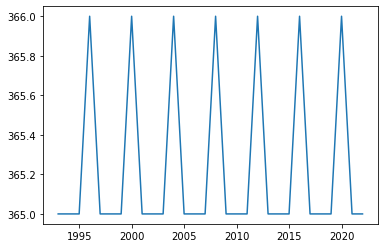

In [28]:
MCI.index = pd.to_datetime(MCI.index)
Yr=MCI.index.year.value_counts().sort_index()
Yr.plot()

In [29]:
MCI.describe()

,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
count,10957.000000,10957.000000,10957.000000,10957.000000,10957.000000,10957.000000
mean,10.123602,0.107212,0.049603,0.161020,65.206352,45.026102
std,3.726921,0.335614,0.412624,0.825734,20.507838,19.355579
min,0.890000,0.000000,0.000000,0.000000,-1.000000,-14.000000
25%,7.380000,0.000000,0.000000,0.000000,50.000000,30.000000
50%,9.620000,0.000000,0.000000,0.000000,68.000000,46.000000
75%,12.300000,0.010000,0.000000,0.000000,83.000000,62.000000
max,27.510000,4.480000,10.500000,11.000000,107.000000,82.000000


array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>],
      dtype=object)

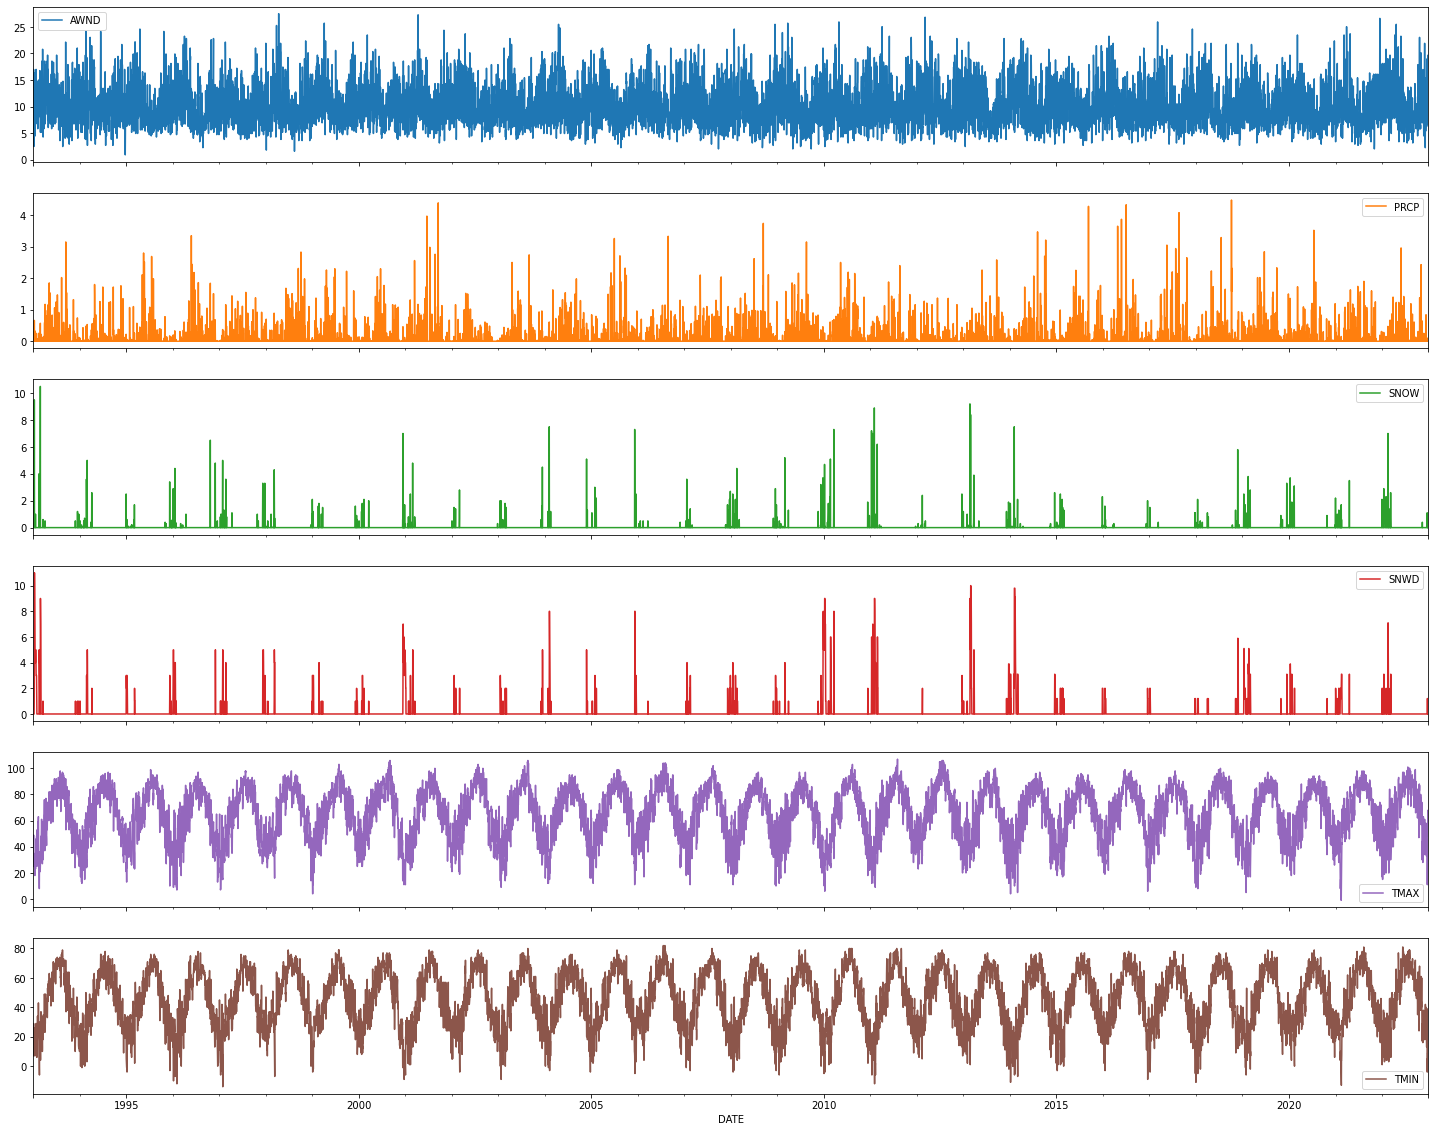

In [30]:
MCI.plot(subplots=True, figsize=(25,20))

array([[<AxesSubplot:title={'center':'AWND'}>,
        <AxesSubplot:title={'center':'PRCP'}>],
       [<AxesSubplot:title={'center':'SNOW'}>,
        <AxesSubplot:title={'center':'SNWD'}>],
       [<AxesSubplot:title={'center':'TMAX'}>,
        <AxesSubplot:title={'center':'TMIN'}>]], dtype=object)

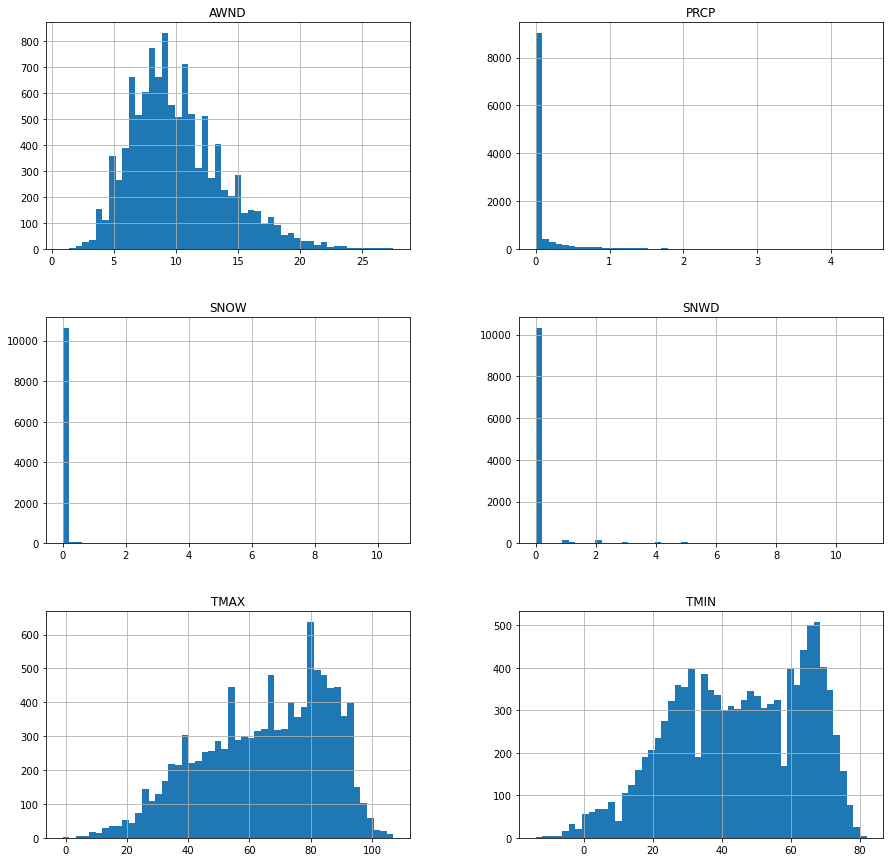

In [31]:
MCI.hist(bins=50,figsize=(15,15))

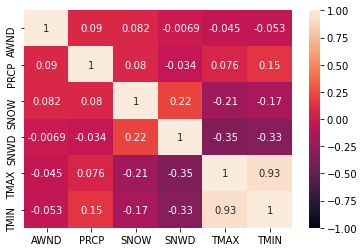

In [32]:
heatmap = sns.heatmap(MCI.corr(), vmin=-1, vmax=1, annot=True)